In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Fetch the data
data=pd.read_csv("polynomial-regression.csv")
data.head(10)

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


In [3]:
# Get the size and shape of the  data
print(data.shape)
print(data.size)

(15, 2)
30


In [4]:
# let's get the info of data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   araba_fiyat    15 non-null     int64
 1   araba_max_hiz  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes
None


In [5]:
# let's change the column names
data=data.rename(columns={"araba_fiyat":"Value","araba_max_hiz":"Price"})
data

,Value,Price
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


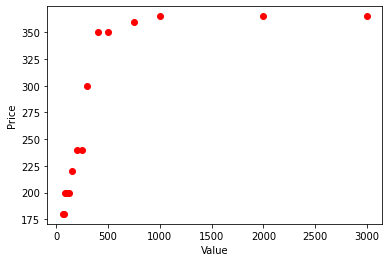

In [6]:
# Plot the data
plt.scatter(data.Value,data.Price,color="red")
plt.xlabel("Value")
plt.ylabel("Price")
plt.show()

In [7]:
# Splitting the value
X=data.Value.values.reshape(-1,1)
y=data.Price.values.reshape(-1,1)


In [8]:
# In the above diagram you can see the data is in the polynomial form
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)
x_poly=pf.fit_transform(X)
x_poly

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [9]:
#Fit the line using linearregression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_poly,y)
y_h=reg.predict(x_poly)
y_h

array([[172.48623128],
       [179.02003947],
       [185.40350013],
       [197.72760866],
       [209.47488899],
       [226.04948065],
       [251.01522484],
       [272.86647328],
       [291.83688333],
       [322.0299441 ],
       [343.30417183],
       [367.53882941],
       [366.80291008],
       [364.35608948],
       [365.08772449]])

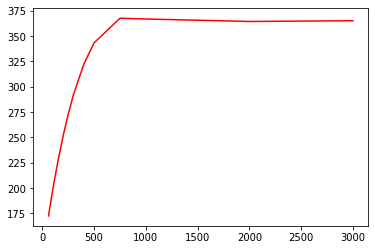

In [10]:
#Show the graph
plt.plot(X,y_h,color="red")
plt.show()

In [11]:
print(y.shape)
print(y_h.shape)

(15, 1)
(15, 1)


In [13]:
y_h

array([[172.48623128],
       [179.02003947],
       [185.40350013],
       [197.72760866],
       [209.47488899],
       [226.04948065],
       [251.01522484],
       [272.86647328],
       [291.83688333],
       [322.0299441 ],
       [343.30417183],
       [367.53882941],
       [366.80291008],
       [364.35608948],
       [365.08772449]])

In [14]:
y_h=y_h.flatten()
y_h

array([172.48623128, 179.02003947, 185.40350013, 197.72760866,
       209.47488899, 226.04948065, 251.01522484, 272.86647328,
       291.83688333, 322.0299441 , 343.30417183, 367.53882941,
       366.80291008, 364.35608948, 365.08772449])

In [17]:
y_h.shape

(15,)

In [19]:
y.shape

(15,)

In [15]:
y=y.flatten()
y

array([180, 180, 200, 200, 200, 220, 240, 240, 300, 350, 350, 360, 365,
       365, 365], dtype=int64)

In [20]:
# Compare the real and prediction value
predict_data=pd.DataFrame({"Actual":y,"predict":y_h})
predict_data

,Actual,predict
0,180,172.486231
1,180,179.020039
2,200,185.403500
3,200,197.727609
4,200,209.474889
5,220,226.049481
6,240,251.015225
7,240,272.866473
8,300,291.836883
9,350,322.029944


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y,y_h))